---
MAT505E - Numerical Analysis I

Homework - 1 - Question 2 and 4

author      : Dilan Kilic (kilicd15@itu.edu.tr)  <br> 
student ID  : 511232119  <br> 
department  : Aeronautical and Astronautical Engineering Dept.  <br> 
created on  : 02.12.2023  <br> 
revised on  : 08.12.2023  <br>
due         : 08.12.2023 @Ninova 23:30


Description : This code is the implementation of Newton-Raphson & Newton-Fourier root finding methods, and natural & clamped spline interpolation methods.

---

# Question 2 - Use the Newton-Fourier method to solve the following equation by using an error tolerance of ϵ = 10−7.

$x^2+x+1=x^3$

In [1]:
# import libraries
import numpy as np
import imageio
import matplotlib.pyplot as plt
import os


'''  
NewtonRaphsonFourier: This class contains 4 main functions.
1) equation()       : Returns the function value for a given x point.
2) derivative()     : Returns the derivative function value for a given x point.
3) newton_fourier() : The main function for Newton-Raphson and Newton-Fourier Methods.
    - Provide 1) float initial guess and 2) fourier=False  ==> Newton-Raphson
    - Provide 1) 2-element list initial guess and 2) fourier=True  ==> Newton-Fourier
4) plot_animation() : Plots and saves the convergence animation.

'''
class NewtonRaphsonFourier():
    def __init__(self):
        pass

    def equation(self,x):
        return x**2 + x + 1 - x**3

    def derivative(self,x):
        return 2*x + 1 - 3*x**2

    def newton_fourier(self,initial_guess, tolerance=1e-7, max_iterations=100,fourier=False):

        # Check the type of initial guess interval
        if isinstance(initial_guess,list) and fourier is False:
            TypeError('For the Newton-Fourier Method, an initial float value should be defined.')
        else:
            if fourier is False:
                #################################################
                # Newton-Raphson Method
                #################################################

                print('>>>>>>>> Newton-Raphson Method Running...')
                # Collect the x values
                x_values = [initial_guess]
                # Make the initial guess the first x value
                x = initial_guess
                # Screen-print for the first iteration
                print(f'Iteration No: {1:5d}, solution: {x:.5f}, error: -')

                for iteration in range(1,max_iterations):
                    # Calculate the function value at a certain x point
                    f_x = self.equation(x)
                    # Calculate the derivative function value at a certain x point
                    f_prime_x = self.derivative(x)
                    
                    if abs(f_prime_x) < tolerance:
                        print("Derivative is close to zero. Newton-Raphson method failed.")
                        return None

                    # Calculate the new iteration point
                    delta_x = -f_x / f_prime_x
                    x = x + delta_x
                    x_values.append(x)

                    # Screen-print for each iteration
                    print(f'Iteration No: {iteration + 1:5d}, solution: {x:.5f}, error: {abs(delta_x):.5f}')
            
                    # Check the convergence
                    if abs(delta_x) < tolerance:
                        print(f">>>>>> Converged in {iteration + 1} iterations with the convergence rate {abs(delta_x):.5f}.")
                        return x, x_values

            else:
                #################################################
                # Newton-Fourier Method
                #################################################

                print('>>>>>>>> Newton-Fourier Method Running...')
                # Check the type of initial guess interval
                if isinstance(initial_guess,list):
                    # Define a and b interval values
                    a = initial_guess[0]
                    b = initial_guess[1]
                    # Collect the x and z values
                    x_values = [b]
                    z_values = [a]
                    # Make the initial guess the first x and z values
                    x = b
                    z = a
                    # Screen-print for the first iteration
                    print(f'Iteration No: {1:5d}, solution: {x:.5f}, error: -')

                    for iteration in range(1,max_iterations):
                        # Calculate the function value at a certain x point and z point
                        f_x = self.equation(x)
                        f_z = self.equation(z)
                        # Calculate the derivative function value at a certain x point
                        f_prime_x = self.derivative(x)
                        
                        if abs(f_prime_x) < tolerance:
                            print("Derivative is close to zero. Newton-Raphson method part failed.")
                            return None

                        # Calculate the new iteration point
                        delta_x = -f_x / f_prime_x
                        x = x + delta_x
                        x_values.append(x)

                        # Calculate the new iteration point
                        delta_z = -f_z / f_prime_x
                        z = z + delta_z
                        z_values.append(z)

                        # Screen-print for each iteration
                        print(f'Iteration No: {iteration + 1:5d}, solution: {x:.5f}, error: {abs(delta_z):.5f}')
                
                        # Check the convergence
                        if abs(delta_z) < tolerance:
                            print(f">>>>>> Converged in {iteration + 1} iterations with the convergence rate {abs(delta_z):.5f}.")
                            return z, z_values
            
    def plot_animation(self,x_values,plot_name='Raphson'):
        # Initialize an empty list to collect the figures
        images = []

        # Create fig folder
        try:
            os.makedirs('fig')
        except:
            pass

        for i in range(len(x_values)):
            fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
            x_plot = np.linspace(min(x_values) - 1, max(x_values) + 1, 1000)
            y_plot = self.equation(x_plot)

            ax.plot(x_plot, y_plot, color='blue', label='Function')

            ax.scatter(x_values[i], self.equation(x_values[i]), color='red', label='Root Estimation', facecolor=None)
            if i == len(x_values)-1:
                pass
            else:
                # Plot the line between the two points
                plt.plot([x_values[i], x_values[i+1]], [self.equation(x_values[i]), 0], color='black',linewidth=0.8)
        
            ax.legend()
            plt.grid(which = "major", linewidth = 1)
            plt.grid(which = "minor", linewidth = 0.5,linestyle=':')
            plt.minorticks_on()
            plt.xlabel('$x$')
            plt.ylabel('$f(x)$')
            plt.title(f'Newton-{plot_name} Method')
            plt.savefig(f'fig/Newton_{plot_name}_iter{i}.png', transparent = False, facecolor = 'white')
            plt.close()

            images.append(imageio.v2.imread(f'fig/Newton_{plot_name}_iter{i}.png'))

        # Save the list of images as a GIF
        imageio.mimsave(f'animation_{plot_name}.gif', # output gif
                    images,          # array of input frames
                    duration = 500, loop = 0)         # optional: frames per second


# ------------------------------------------------------------ USER-DEFINED INPUTS ------------------------------------------------------------ #
# call main class
nrf = NewtonRaphsonFourier()

# ----------------------------------------------------------- NEWTON-RAPHSON METHOD ----------------------------------------------------------- #
# Initial guess
initial_guess = 0.5 # or 2.5

# Solve the equation using Newton-Fourier method and get the values for visualization
solution_raphson, x_values = nrf.newton_fourier(initial_guess=initial_guess,fourier=False)

# Plot the animation
if solution_raphson is not None:
    print("Solution: %.7f" % solution_raphson)
    # Visualize the Newton-Raphson method as an animation
    nrf.plot_animation(x_values,plot_name='Raphson')

# ----------------------------------------------------------- NEWTON-FOURIER METHOD ----------------------------------------------------------- #
# Initial guess
initial_guess = [0.5,2.0]

# Solve the equation using Newton-Fourier method and get the values for visualization
solution_fourier, z_values = nrf.newton_fourier(initial_guess=initial_guess,fourier=True)

# Plot the animation
if solution_fourier is not None:
    print("Solution: %.7f" % solution_fourier)
    # Visualize the Newton-Fourier method as an animation
    nrf.plot_animation(z_values,plot_name='Fourier')


>>>>>>>> Newton-Raphson Method Running...
Iteration No:     1, solution: 0.50000, error: -
Iteration No:     2, solution: -0.80000, error: 1.30000
Iteration No:     3, solution: -0.26349, error: 0.53651
Iteration No:     4, solution: -3.37695, error: 3.11345
Iteration No:     5, solution: -2.18749, error: 1.18945
Iteration No:     6, solution: -1.39422, error: 0.79328
Iteration No:     7, solution: -0.83519, error: 0.55903
Iteration No:     8, solution: -0.31223, error: 0.52296
Iteration No:     9, solution: -10.13256, error: 9.82033
Iteration No:    10, solution: -6.66806, error: 3.46451
Iteration No:    11, solution: -4.36731, error: 2.30075
Iteration No:    12, solution: -2.84309, error: 1.52422
Iteration No:    13, solution: -1.83322, error: 1.00987
Iteration No:    14, solution: -1.15170, error: 0.68152
Iteration No:    15, solution: -0.64015, error: 0.51155
Iteration No:    16, solution: 0.04343, error: 0.68357
Iteration No:    17, solution: -0.92331, error: 0.96674
Iteration No:

In [2]:
# Check the results from Scipy Library
from scipy import optimize
root= optimize.newton(nrf.equation, 0.5, fprime=nrf.derivative, full_output=True)
print(root)

(1.8392867552141612,       converged: True
           flag: 'converged'
 function_calls: 44
     iterations: 22
           root: 1.8392867552141612)


In [3]:
# Check the results from Scipy Library
from scipy import optimize
root= optimize.newton(nrf.equation, 2.5, fprime=nrf.derivative, full_output=True)
print(root)

(1.839286755214161,       converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: 1.839286755214161)


# Question 4 - Find and plot the cubic spline S satisfying S(0) = 1, S(1) = 3, S(2) = 1, S(3) = 4, S(4) = 2 and with S′(0) = 2 and S′(4) = −1.

- Spline Interpolation
    - Linear Splines
    - Quadratic Splines
    - Cubic Splines*
        - Natural Cubic Splines*
        - Clamped Cubic Splines

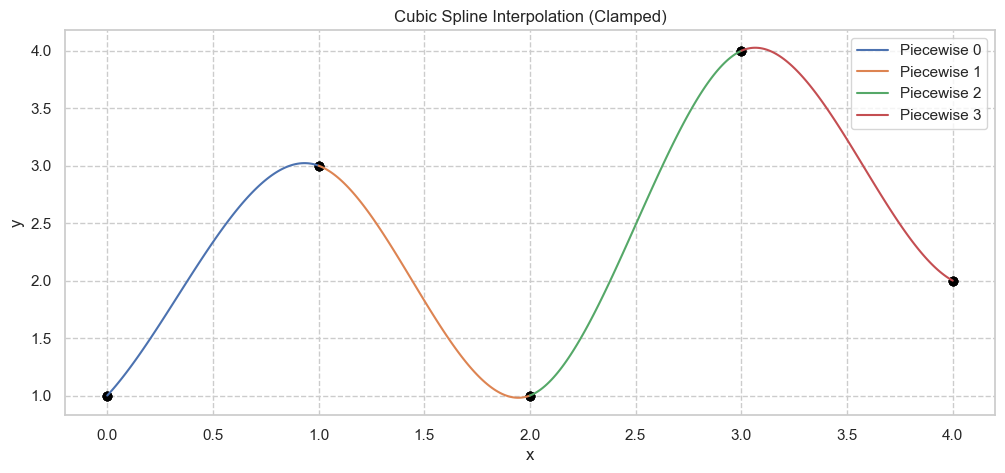

The integral area: 9.7500000


[array([1., 3., 1., 4., 2.]),
 array([ 2.        , -0.67857143,  0.71428571,  0.82142857,  0.        ]),
 array([ 2.67857143, -5.35714286,  6.75      , -6.64285714,  0.        ]),
 array([-2.67857143,  4.03571429, -4.46428571,  3.82142857,  0.        ])]

In [6]:
# import libraries
import math
import numpy as np
from sympy import symbols
import matplotlib.pyplot as plt
# optional libraries for plotting
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

'''  
CubicSpline: This class contains 4 main functions.
1) cubic_spline()         : The main function for Natural Spline method and returns the coefficients of piecewise functions.
2) clamped_cubic_spline() : The main function for Clamped Spline method and returns the coefficients of piecewise functions.
3) create_Cspline_func()  : Creates the function with the defined coefficients and x-y points, and returns a symbolic function.
4) plot_Cspline_func()    : Plots the piecewise splines.

'''

class CubicSpline():
    def __init__(self):
        pass

    def cubic_spline(self,xData,yData):

        # Step 1
        h = np.zeros((len(xData)))
        for i in range(len(xData)-1):
            h[i] = xData[i+1] - xData[i]

        # Step 2
        alpha = np.zeros((len(xData)))
        for i in range(1,len(xData)-1):
            alpha[i] = (3/h[i])*(yData[i+1]-yData[i]) - (3/h[i-1])*(yData[i]-yData[i-1])

        # Step 3
        l = np.zeros((len(xData))); l[0]=1
        nu = np.zeros((len(xData))); nu[0]=0
        z = np.zeros((len(xData))); z[0]=0

        # Step 4
        for i in range(1,len(xData)-1):
            l[i] = 2*(xData[i+1]-xData[i-1]) - h[i-1]*nu[i-1]
            nu[i] = h[i]/l[i]
            z[i] = (alpha[i]-h[i-1]*z[i-1])/l[i]

        # Step 5
        l[-1] = 1; z[-1] = 0 
        c = np.zeros((len(xData))); c[-1]=0

        # Step 6
        b = np.zeros((len(xData)))
        d = np.zeros((len(xData)))
        for i in list(range(0,len(xData)-1))[::-1]:
            c[i] = z[i] - nu[i]*c[i+1]
            b[i] = (yData[i+1]-yData[i])/h[i] - h[i]*(c[i+1]+2*c[i])/3
            d[i] = (c[i+1]-c[i])/(3*h[i])

        a = yData

        coef = [a,b,c,d]

        return coef

    def clamped_cubic_spline(self,xData,yData,d_left,d_right):

        # Step 1
        h = np.zeros((len(xData)))
        for i in range(len(xData)-1):
            h[i] = xData[i+1] - xData[i]

        # Step 2
        alpha = np.zeros((len(xData)))
        alpha[0] = 3*(yData[1]-yData[0])/h[0] - 3*d_left
        alpha[-1] = 3*d_right - 3*(yData[-1]-yData[-2])/h[-2]


        # Step 3
        for i in range(1,len(xData)-1):
            alpha[i] = (3/h[i])*(yData[i+1]-yData[i]) - (3/h[i-1])*(yData[i]-yData[i-1])

        # Step 4
        l = np.zeros((len(xData))); l[0]=2*h[0]
        nu = np.zeros((len(xData))); nu[0]=0.5
        z = np.zeros((len(xData))); z[0]=alpha[0]/l[0]

        # Step 5
        for i in range(1,len(xData)-1):
            l[i] = 2*(xData[i+1]-xData[i-1]) - h[i-1]*nu[i-1]
            nu[i] = h[i]/l[i]
            z[i] = (alpha[i]-h[i-1]*z[i-1])/l[i]

        # Step 6
        l[-1] = h[-2]*(2-nu[-2])
        z[-1] = (alpha[-1]-h[-2]*z[-2])/l[-1] 
        c = np.zeros((len(xData))); c[-1]= z[-1]


        # Step 7
        b = np.zeros((len(xData)))
        d = np.zeros((len(xData)))
        for i in list(range(0,len(xData)-1))[::-1]:
            c[i] = z[i] - nu[i]*c[i+1]
            b[i] = (yData[i+1]-yData[i])/h[i] - h[i]*(c[i+1]+2*c[i])/3
            d[i] = (c[i+1]-c[i])/(3*h[i])

        a = yData
        c[-1] = 0

        coef = [a,b,c,d]

        return coef

    def create_Cspline_func(self,coefs,x,y):
        x_sym = symbols('x')

        fun = []
        for i in range(len(xData)-1):
            fun.append(coef[0][i] + coef[1][i]*(x_sym-xData[i]) + coef[2][i]*(x_sym-xData[i])**2 + coef[3][i]*(x_sym-xData[i])**3)

        return fun

    def plot_Cspline_func(self,piecewise_func,xData,yData,plot_type='Clamped'):

        x_sym = symbols('x')

        # Create a Matplotlib figure and axis
        fig = plt.figure(figsize = (12,5))

        for i in range(len(piecewise_func)):
            x_val = np.linspace(xData[i],xData[i+1],100)
            y_val = [piecewise_func[i].subs(x_sym, val) for val in x_val]

            plt.plot(x_val, y_val, label=f'Piecewise {i}')
            plt.scatter(xData,yData,color='black')

        # Customize the plot
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.title(f'Cubic Spline Interpolation ({plot_type})')

        # Save the figure for later use
        #fig.savefig('spline_plot.png')

        plt.show()

        return fig




# call main class
cs = CubicSpline()
# ----------------------------------------------------------- EXAMPLE 1 (VALIDATION - NATURAL SPLINE) ----------------------------------------------------------- #
# xData = np.array([0.0,1.0,2.0,3.0])
# yData = np.array([1.0,math.e,(math.e)**2,(math.e)**3])
# coef = cs.cubic_spline(xData,yData)
# piecewise_func = cs.create_Cspline_func(coef,xData,yData)
# cs.plot_Cspline_func(piecewise_func,xData,yData,plot_type='Natural');
# print('The integral area: %.7f' % (np.sum(coef[0][:-1]) + (1/2)*(np.sum(coef[1])) + (1/3)*(np.sum(coef[2]))))

# ----------------------------------------------------------- EXAMPLE 2 (VALIDATION - CLAMPED SPLINE) ----------------------------------------------------------- #
# xData = np.array([0.0,1.0,2.0,3.0])
# yData = np.array([1.0,math.e,(math.e)**2,(math.e)**3])
# d_left = 1; d_right = (math.e)**3
# coef = cs.clamped_cubic_spline(xData,yData,d_left,d_right)
# piecewise_func = cs.create_Cspline_func(coef,xData,yData)
# cs.plot_Cspline_func(piecewise_func,xData,yData,plot_type='Clamped');
# print('The integral area: %.7f' % (np.sum(coef[0][:-1]) + (1/2)*(np.sum(coef[1])) + (1/3)*(np.sum(coef[2]))))

# -------------------------------------------------------------- HOMEWORK PROBLEM (NATURAL SPLINE) -------------------------------------------------------------- #
# xData = np.array([0.0,1.0,2.0,3.0,4.0])
# yData = np.array([1.0,3.0,1.0,4.0,2.0])

# coef = cs.cubic_spline(xData,yData)
# piecewise_func = cs.create_Cspline_func(coef,xData,yData)
# cs.plot_Cspline_func(piecewise_func,xData,yData,plot_type='Natural');
# print('The integral area: %.7f' % (np.sum(coef[0][:-1]) + (1/2)*(np.sum(coef[1])) + (1/3)*(np.sum(coef[2])) + (1/4)*(np.sum(coef[3]))))

# -------------------------------------------------------------- HOMEWORK PROBLEM (CLAMPED SPLINE) -------------------------------------------------------------- #
xData = np.array([0.0,1.0,2.0,3.0,4.0])
yData = np.array([1.0,3.0,1.0,4.0,2.0])
d_left = 2; d_right = -1

coef = cs.clamped_cubic_spline(xData,yData,d_left,d_right)
piecewise_func = cs.create_Cspline_func(coef,xData,yData)
cs.plot_Cspline_func(piecewise_func,xData,yData,plot_type='Clamped');
print('The integral area: %.7f' % (np.sum(coef[0][:-1]) + (1/2)*(np.sum(coef[1])) + (1/3)*(np.sum(coef[2])) + (1/4)*(np.sum(coef[3]))))


coef